## 2. Central Limit Theorem  

The Pareto distribution is a well-known probability measure parametrized by a real number $ b > 0 $. There is no closed-form expression for the probability distribution

$
\overline{P_n} = \frac{1}{n} \sum_{i=1}^n P
$

when $ P $ is the Pareto distribution (unlike the case of the Normal or $ \chi^2 $ distributions which you covered in the last lab). In this exercise, you will use the Central Limit Theorem (CLT) to **approximate** this distribution.

The CLT states that for probability measures with a mean and a variance, for sufficiently large values of $ N $, the sample mean of $ N $ independent and identically distributed Pareto distributions $ \text{Pareto}(b) $ is approximately given by a Normal Distribution with mean $ \mu(\text{Pareto}(b)) $ and variance $ \frac{\sigma^2(\text{Pareto}(b))}{N} $. Follow these steps:

  **(a)** We investigate the case where $ b = 5 $ and $ N = [5, 10, 30] $
  

In [1]:
import numpy as np

from scipy import stats
from scipy.stats import pareto, norm  

from matplotlib import pyplot as plt 

In [10]:
N = [ 5, 10, 30 ]
size = 100000
b = 5 

mean, var, skew, kurt = pareto.stats(b, moments='mvsk') 
print(mean, var,)

1.25 0.10416666666666667


Let $ X \sim \text{Pareto}(5) $, then $ \mu(X) = 1.25 $ and $ \text{Var}(X) = 0.10  $


**(b)** For each value $ n $ in $ N $, sample a $size \times n$ array of samples from the distribution $ \text{Pareto}(b) $ we:

  **i)** Compute the sample average along each row  and plot their histogram in a subplot.

  **ii)** Plot the approximate density of the distribution of sample averages which is given by the CLT as described above.

  **iii)** Display the QQ plot of the sample means versus their approximate distribution given by the CLT.


(100000, 5)
(100000,)
(100000, 10)
(100000,)
(100000, 30)
(100000,)


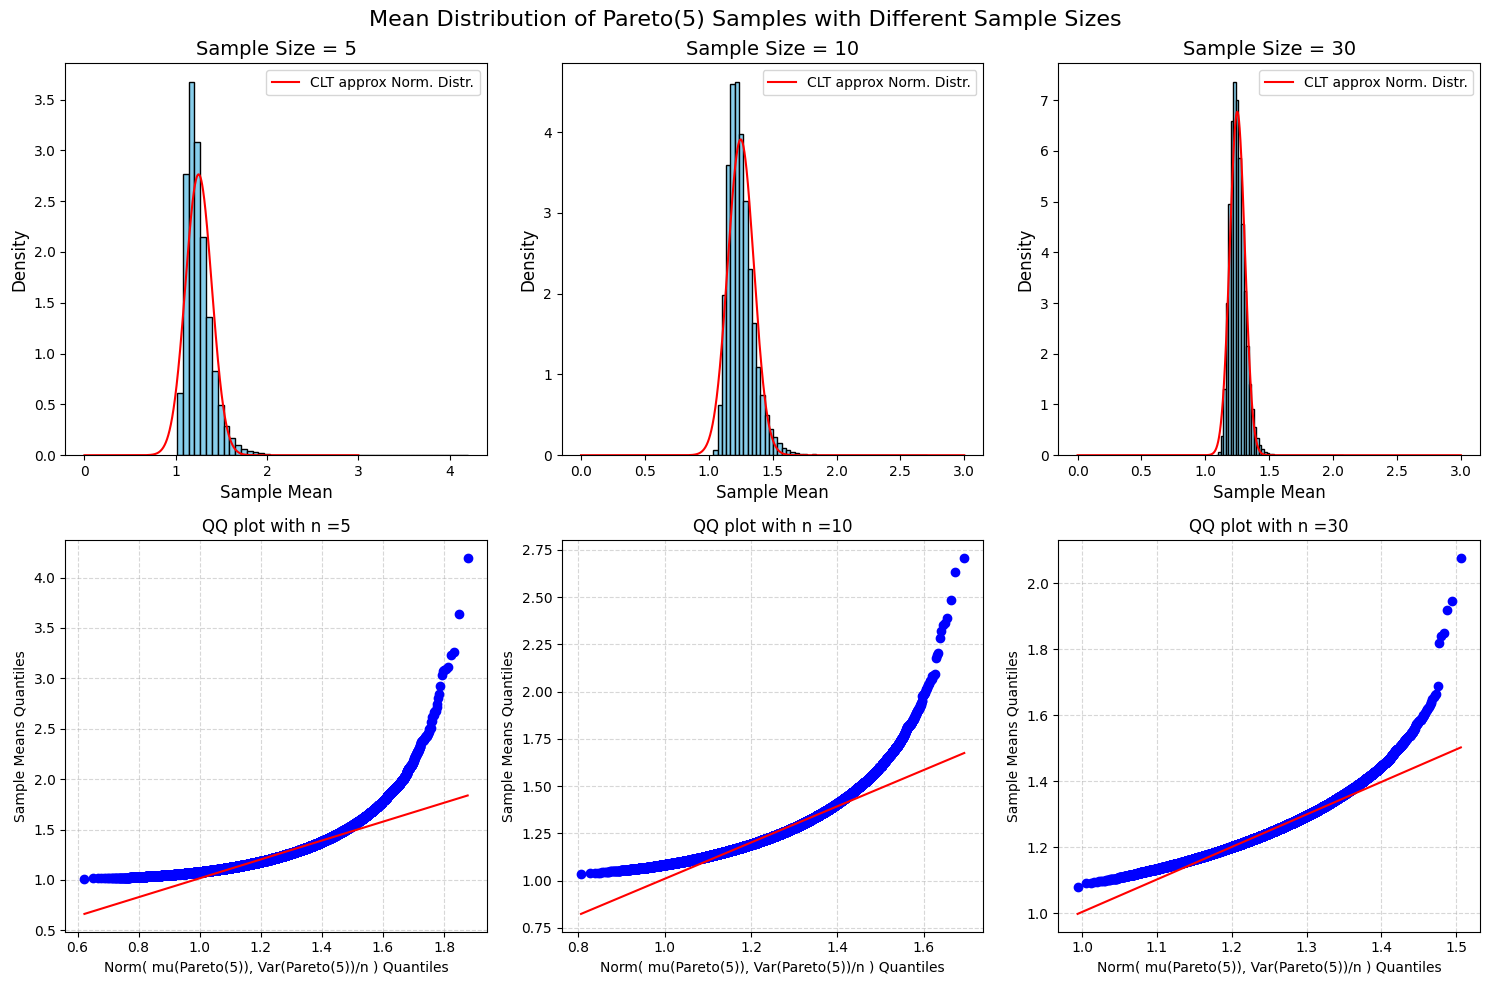

In [11]:
fig, axes = plt.subplots(2, len(N), figsize=(15, 10))   
fig.suptitle("Mean Distribution of Pareto(5) Samples with Different Sample Sizes", fontsize=16) 


for i, n in enumerate(N): 
    samples = pareto.rvs(b=b, size=(size, n ))
    print(samples.shape) 
    samples_mean = samples.mean(axis=1)
    print(samples_mean.shape)
    
    x = np.linspace(start=0, stop= 3, num= size)
    norm_dist = norm.pdf(x, loc= mean, scale= np.sqrt(var/n))
    
    axes[0,i].hist(samples_mean, density = True, bins=50, color='skyblue', edgecolor='black')
    axes[0,i].plot(x, norm_dist, color = 'red', label = 'CLT approx Norm. Distr.')
    axes[0,i].set_title(f"Sample Size = {n}", fontsize=14)
    axes[0,i].set_xlabel("Sample Mean", fontsize=12)
    axes[0,i].set_ylabel("Density", fontsize=12)
    axes[0,i].legend()
    
    #qq plot
    stats.probplot(samples_mean, dist="norm", sparams=(mean, np.sqrt(var/n)), plot= axes[1,i])
    axes[1,i].set_title(f'QQ plot with n ={n}')
    axes[1,i].set_xlabel(f"Norm( mu(Pareto({b})), Var(Pareto({b}))/n ) Quantiles")
    axes[1,i].set_ylabel("Sample Means Quantiles")  
    axes[1,i].grid(True, linestyle='--', alpha=0.5)

plt.tight_layout()  
plt.show()


$ N >=30 $ provides the approximate density of sample means given by the CLT a sufficiently good approximation of the actual distribution from which we've drawn samples.

This is backed up by the histogram above as for n= 5,10 the pdf does not fit very well the bins of the graph as well as from the QQ-plot where the majority of quantiles match and the rest i.e. tails are very close to the converging CLT normal distribution . 


  **(g)** Lets re-run our code for $ \text{Pareto}(2) $ instead of $ \text{Pareto}(5) $. 

In [12]:
beta = 2

mean, var, skew, kurt = pareto.stats(beta, moments='mvsk') 
mean, var, skew, kurt

(2.0, inf, nan, nan)

c:\Users\aprog\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\core\_methods.py:118: RuntimeWarning: invalid value encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims, where=where)


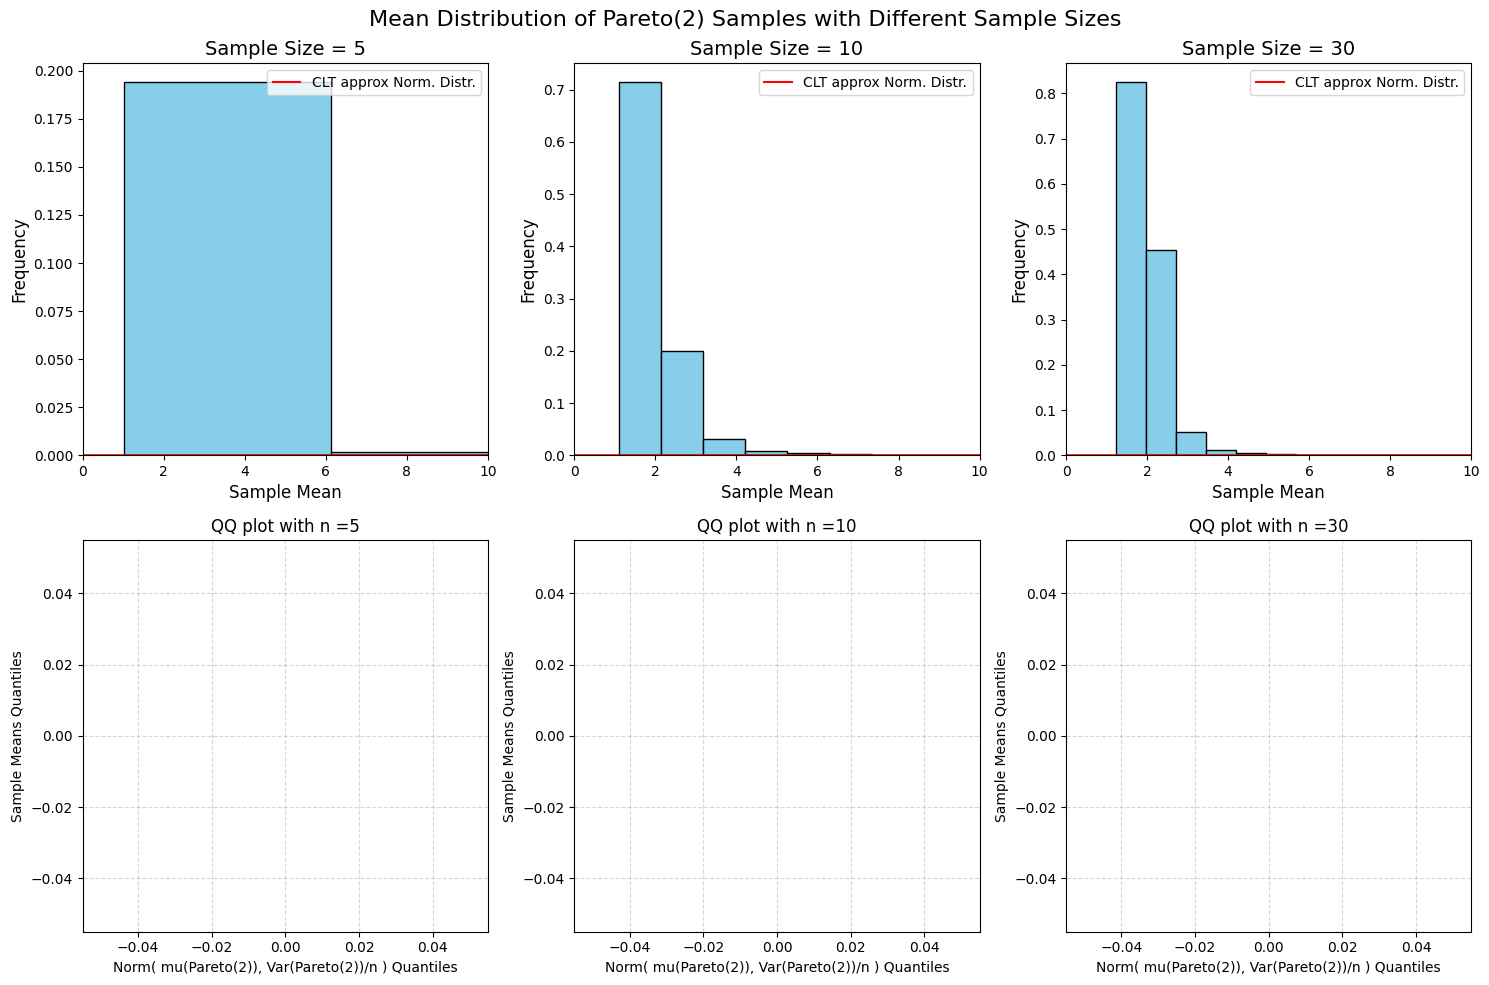

In [13]:
fig, axes = plt.subplots(2, len(N), figsize=(15, 10))   
fig.suptitle("Mean Distribution of Pareto(2) Samples with Different Sample Sizes", fontsize=16)
beta=  3-1
for i, n in enumerate(N): 
    samples = pareto.rvs(b=beta, size=(size, n ))
    #print(samples.shape) 
    
    samples_mean = samples.mean(axis=1)
    #print(samples_mean.shape)
    
    x = np.linspace(start=0, stop= 10, num= size)
    norm_dist = norm.pdf(x, loc= mean, scale= np.sqrt(var/n))
    
    axes[0,i].hist(samples_mean, density = True, bins=50, color='skyblue', edgecolor='black')
    axes[0,i].plot(x, norm_dist, color = 'red', label = 'CLT approx Norm. Distr.')
    axes[0,i].set_title(f"Sample Size = {n}", fontsize=14)
    axes[0,i].set_xlabel("Sample Mean", fontsize=12)
    axes[0,i].set_ylabel("Frequency", fontsize=12)
    axes[0,i].set_xlim(0,10)
    axes[0,i].legend()
    
    stats.probplot(samples_mean, dist="norm", sparams=(mean, np.sqrt(var/n)), plot= axes[1,i])
    axes[1,i].set_title(f'QQ plot with n ={n}')
    axes[1,i].set_xlabel(f"Norm( mu(Pareto({beta})), Var(Pareto({beta}))/n ) Quantiles")
    axes[1,i].set_ylabel("Sample Means Quantiles")  
    axes[1,i].grid(True, linestyle='--', alpha=0.5)
 
plt.tight_layout()  
plt.show()


$
\text{Let } X \sim \text{Pareto}(2), \text{ then } \mu(X) = \text{2} \text{ and } \text{Var}(X) = \infty.
$


## 1. CLT Assumptions
The **Central Limit Theorem (CLT)** has the assumptions:
- The individual random variables(RV's) have **finite variance**.  
- The distribution of the individual random variables is not too "heavy-tailed".

    As we are trying to apply the theorem to $ X_{1},...X_{size}  \quad where \quad X_{i} \sim \text{Pareto}(2)$ and $\text{Var}(X_{i}) = \infty \quad \forall i \in \{1,  \dots, \text{size}\} \newline$ 
    this is the reason our experiment will not work.   Since the Pareto(2) distribution has infinite variance, it fails to meet the key assumption of the CLT, which requires the individual RV's to have a finite variance.

## 2. Heavy Tails  
The Pareto(2) distribution has a **power-law tail** and therefore the probability of observing very large values decays slowly compared to for example normal distribution. Specifically, the probability of a random variable $ X $ from a Pareto distribution being greater than some value $ x $ is proportional to $ \frac{1}{x^2} $ for large $ x $. 

This slow decay of the tail implies that extreme values can significantly affect the sum of samples from this distribution, which leads to behavior that is inconsistent with the Central Limit Theorem.
 

## 3. Infinite Variance dowstream issues

Central Limit Theorem states that under conditions of finite mean and variance, the sum of **IID** random variables will converge to a normal distribution as the number of variables increases. However, with infinite variance, this convergence does not happen, and the sum tends towards another distribution with **infinite variance**, which does not resemble the normal distribution.

The reason our QQ-plots are empty is that we assume the converging distribution is a normal with infinite variance and therefore its pdf is 0, resulting in the empty QQ-plots.

$ \textbf{Proof:} $

Let $ X  \sim \text{Norm}( \mu, \sigma) $:

$
f(x) = \frac{1}{\sqrt{2\pi\sigma^2}} \exp\left( -\frac{(x - \mu)^2}{2\sigma^2} \right)
$

As the variance $\sigma^2 $ tends to infinity, we have:

$
\lim_{\sigma^2 \to \infty} f(x) = 0
$

Therefore, the PDF of a normal distribution with infinite variance is zero everywhere   $\square$
